## Business Context
The real estate sector can be very unpredictable and susceptible to a downturn in times of economic crisis. Whenever the economy suffers, the number of stressed assets can become a huge problem for housing finance companies. The bad debt and stressed assets result in a liquidity crunch and impact the banks that are lenders to both developers and property buyers. Timely risk analysis of these accounts can help lenders forecast the number and value of accounts that are at risk of developing into a Bad Debt in near future and eventually help them mitigate the losses.

## About the Data
The data belongs to the billing systems of various societies. These societies could be residential or public. The data has been collected over the years and has been summarised according to the total amount billed versus the total amount generated from the consumers. For each account, there is a label indicating whether an account resulted in a Bad Debt (the account that would be unable to pay the amount).

## Feature Summary
AccID: An unique id for the account

CategoryID: An unique id for the category of the society

Category: Category of society 

Value: The market value of the particular property (account)

PropertySize: The size of the property in square meters

BillingAmt: The total amount payable by the resident to the society management

AverageBillingAmt: The average amount payable by the resident to the society management

CollectedAmt: The total amount collected from the resident 

AverageCollectedAmt: The average amount collected from the resident 

DebtAmt: The Total Debt that is at 90 days or more

WriteOffAmt: The Total amount of debt that has been written off

CollectionRatio: The ratio between the Total amount collected and Total Billing (ie. CollectedAmt/ BillingAmt)

DebtBillingRatio: The ratio between the Total Debt and Total Billing (ie. (Total Debt + Total Write Off)/Total Billing)

TotalElectricityBill: The total amount billed for electricity. This field was put in place because it is used as a means to recover debt - ie. If an amount is outstanding for any service the management has the right to cut a consumer's electricity connection.

HasID: The resident has an ID number. 

Label: 1 = Is considered to be a Bad Debt, 0 = Not considered to be a Bad Debt

In [285]:

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scoresny
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [286]:
data  = pd.read_csv('account_train_1.csv')

In [287]:
data

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0
1,95daa45d-3dfd-4c60-aae4-05e78b0de26e,1,Residential,36000,315,378,3,522,522,0,0,1.38,0.00,0,0,0
2,40536c2d-c0a2-4486-b0aa-60b36dfa290a,1,Residential,700000,528,25150,345,25104,349,0,0,1.00,0.00,10715,1,0
3,52a2254d-44e5-4dc9-8e08-1b135096172c,5,Municipal,40000,0,4773,133,0,0,7319,0,0.00,1.53,0,1,1
4,1e0363e4-2029-4b62-a9ec-d909cee000cb,1,Residential,125800,0,-4,0,445,445,0,0,-121.26,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100471,3ade0e2d-b0c1-4092-bae3-f2fba62fb6af,1,Residential,145000,309,2888,78,0,0,25835,0,0.00,8.95,0,1,1
100472,5ac71a8f-b457-4c01-84ee-5a0b89387d0c,1,Residential,750000,1176,31169,427,31091,432,0,0,1.00,0.00,15616,1,0
100473,7d8cdaa6-13a6-4aef-a2c2-3091be566bfb,1,Residential,165000,360,6665,79,3400,378,4974,0,0.51,0.75,0,1,1
100474,151da2b4-8fe2-4607-b415-14cf09ace6f8,1,Residential,2088500,2146,53907,499,34639,4330,128096,0,0.64,2.38,26939,1,1


In [288]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,100476.0,2.245511,2.730572e+00,1.0,1.0,1.0,2.00,13.0
Value,100476.0,707020.754379,3.047463e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100476.0,746822.707124,5.651558e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.0,107.0,281.00,805044.0
CollectedAmt,100476.0,9763.645487,1.201449e+05,-219260.0,0.0,360.0,7402.25,24371134.0
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.0,100.0,768.00,6828297.0
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.0,0.5,1.00,1701912.0


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AccID                 100476 non-null  object 
 1   CategoryID            100476 non-null  int64  
 2   Category              100476 non-null  object 
 3   Value                 100476 non-null  int64  
 4   PropertySize          100476 non-null  int64  
 5   BillingAmt            100476 non-null  int64  
 6   AverageBillingAmt     100476 non-null  int64  
 7   CollectedAmt          100476 non-null  int64  
 8   AverageCollectedAmt   100476 non-null  int64  
 9   DebtAmt               100476 non-null  int64  
 10  WriteOffAmt           100476 non-null  int64  
 11  CollectionRatio       100476 non-null  float64
 12  DebtBillingRatio      100476 non-null  float64
 13  TotalElectricityBill  100476 non-null  int64  
 14  HasID                 100476 non-null  int64  
 15  

In [290]:
data.nunique()

AccID                   100476
CategoryID                  12
Category                    12
Value                    10427
PropertySize             14208
BillingAmt               28464
AverageBillingAmt         5610
CollectedAmt             23605
AverageCollectedAmt       9044
DebtAmt                  20453
WriteOffAmt               5099
CollectionRatio           1682
DebtBillingRatio          6485
TotalElectricityBill     11211
HasID                        2
Label                        2
dtype: int64

In [291]:
data['Category'] = data['Category'].astype('category')
data['CategoryID'] = data['CategoryID'].astype('category')
data['HasID'] = data['HasID'].astype('category')
data['Label'] = data['Label'].astype('category')

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   AccID                 100476 non-null  object  
 1   CategoryID            100476 non-null  category
 2   Category              100476 non-null  category
 3   Value                 100476 non-null  int64   
 4   PropertySize          100476 non-null  int64   
 5   BillingAmt            100476 non-null  int64   
 6   AverageBillingAmt     100476 non-null  int64   
 7   CollectedAmt          100476 non-null  int64   
 8   AverageCollectedAmt   100476 non-null  int64   
 9   DebtAmt               100476 non-null  int64   
 10  WriteOffAmt           100476 non-null  int64   
 11  CollectionRatio       100476 non-null  float64 
 12  DebtBillingRatio      100476 non-null  float64 
 13  TotalElectricityBill  100476 non-null  int64   
 14  HasID                 100476 non-nul

In [293]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,100476.0,707020.754379,3.047463e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100476.0,746822.707124,5.651558e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.0,107.0,281.00,805044.0
CollectedAmt,100476.0,9763.645487,1.201449e+05,-219260.0,0.0,360.0,7402.25,24371134.0
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.0,100.0,768.00,6828297.0
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.0,0.5,1.00,1701912.0
DebtBillingRatio,100476.0,18.632894,6.274720e+03,-436506.0,0.0,0.0,1.28,1836304.0


In [294]:
#unqiue values of all the categories
cols_cat= data.select_dtypes(['category'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in CategoryID are :
1     74339
4      7559
11     6642
2      5871
6      2878
5      2198
7       388
12      335
3       181
8        69
9        14
13        2
Name: CategoryID, dtype: int64
**************************************************
Unique values in Category are :
Residential                 74339
Agricultural                 7559
Unknown                      6642
Business                     5871
Government                   2878
Municipal                    2198
Educational                   388
Place of Worship              335
Industry                      181
Infrastructure                 69
Public Benefit                 14
Environmental Management        2
Name: Category, dtype: int64
**************************************************
Unique values in HasID are :
0    57509
1    42967
Name: HasID, dtype: int64
**************************************************
Unique values in Label are :
0    54114
1    46362
Name: Label, dtype: int64
***************

In [295]:
#Develop a function that takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

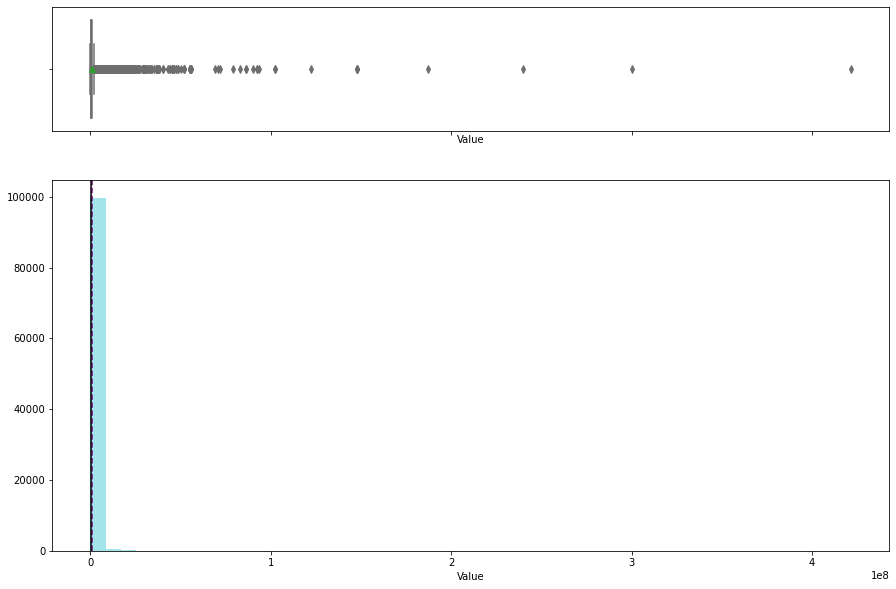

In [296]:
histogram_boxplot(data["Value"])

<AxesSubplot:xlabel='Value', ylabel='Count'>

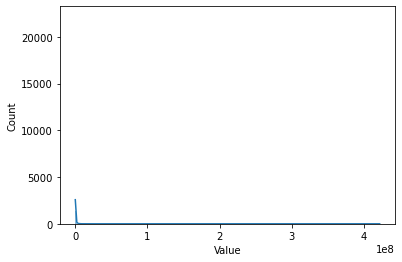

In [297]:
sns.histplot(data["Value"], kde=True)

In [298]:
data.loc[data['Value'] == 0,'Value'] = np.nan

In [299]:
data["Value_log"] = np.log(data["Value"])
data["Value_log"]

0         14.799348
1         10.491274
2         13.458836
3         10.596635
4         11.742449
            ...    
100471    11.884489
100472    13.527828
100473    12.013701
100474    14.551957
100475    10.050182
Name: Value_log, Length: 100476, dtype: float64

In [300]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Value,91458.0,776734.865370,3.185690e+06,1.0,41000.000000,140000.000000,830000.000000,4.218600e+08
PropertySize,100476.0,746822.707124,5.651558e+06,0.0,276.000000,511.000000,1162.000000,2.705160e+08
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.000000,3141.000000,8715.000000,2.613362e+07
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.000000,107.000000,281.000000,8.050440e+05
CollectedAmt,100476.0,9763.645487,1.201449e+05,-219260.0,0.000000,360.000000,7402.250000,2.437113e+07
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.000000,100.000000,768.000000,6.828297e+06
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.000000,0.000000,2298.000000,6.322610e+06
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.000000,0.000000,0.000000,4.306605e+06
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.000000,0.500000,1.000000,1.701912e+06
DebtBillingRatio,100476.0,18.632894,6.274720e+03,-436506.0,0.000000,0.000000,1.280000,1.836304e+06


<AxesSubplot:xlabel='Value_log', ylabel='Count'>

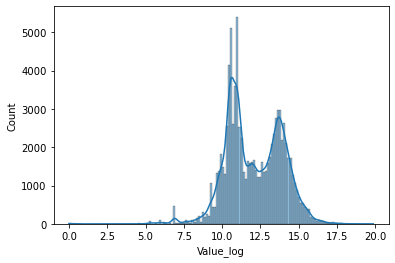

In [301]:
sns.histplot(data["Value_log"], kde=True)

<AxesSubplot:ylabel='Count'>

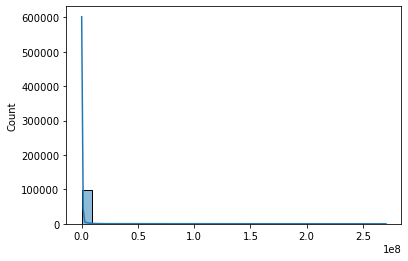

In [302]:
sns.histplot(data["PropertySize"].values, kde=True, bins =30)

In [303]:
data.loc[data['PropertySize'] == 0,'PropertySize'] = np.nan

In [304]:
data["PropertySize_log"] = np.log(data["PropertySize"])
data["PropertySize_log"]

0         6.371612
1         5.752573
2         6.269096
3              NaN
4              NaN
            ...   
100471    5.733341
100472    7.069874
100473    5.886104
100474    7.671361
100475    5.620401
Name: PropertySize_log, Length: 100476, dtype: float64

<AxesSubplot:xlabel='PropertySize_log', ylabel='Count'>

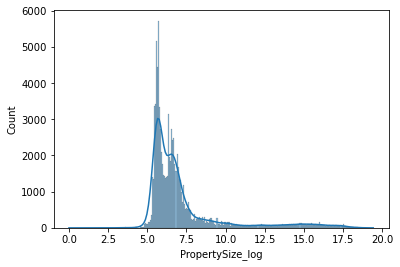

In [305]:
sns.histplot(data["PropertySize_log"], kde=True)

In [306]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,91458.0,776734.865370,3.185690e+06,1.0,41000.000000,140000.000000,830000.000000,4.218600e+08
PropertySize,91643.0,818805.127735,5.912677e+06,1.0,300.000000,600.000000,1310.000000,2.705160e+08
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.000000,3141.000000,8715.000000,2.613362e+07
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.000000,107.000000,281.000000,8.050440e+05
CollectedAmt,100476.0,9763.645487,1.201449e+05,-219260.0,0.000000,360.000000,7402.250000,2.437113e+07
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.000000,100.000000,768.000000,6.828297e+06
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.000000,0.000000,2298.000000,6.322610e+06
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.000000,0.000000,0.000000,4.306605e+06
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.000000,0.500000,1.000000,1.701912e+06
DebtBillingRatio,100476.0,18.632894,6.274720e+03,-436506.0,0.000000,0.000000,1.280000,1.836304e+06


<AxesSubplot:ylabel='Count'>

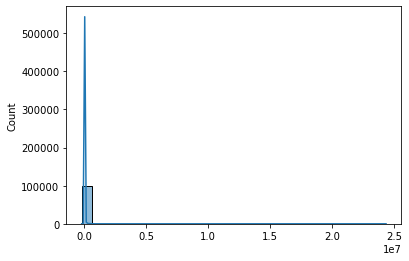

In [307]:
sns.histplot(data["CollectedAmt"].values, kde=True, bins =30)

In [308]:
data.loc[data['CollectedAmt'] == 0,'CollectedAmt'] = np.nan


In [309]:
data["CollectedAmt_log"] = np.log(data["CollectedAmt"])
data["CollectedAmt_log"]

0         10.678583
1          6.257668
2         10.130782
3               NaN
4          6.098074
            ...    
100471          NaN
100472    10.344674
100473     8.131531
100474    10.452735
100475     7.649693
Name: CollectedAmt_log, Length: 100476, dtype: float64

<AxesSubplot:xlabel='CollectedAmt_log', ylabel='Count'>

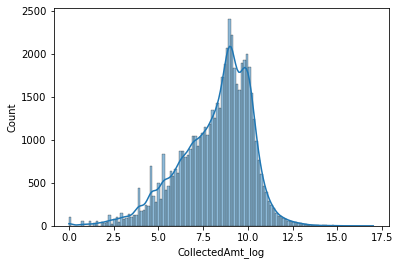

In [310]:
sns.histplot(data["CollectedAmt_log"], kde=True)

In [311]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,91458.0,776734.865370,3.185690e+06,1.0,41000.000000,140000.000000,830000.000000,4.218600e+08
PropertySize,91643.0,818805.127735,5.912677e+06,1.0,300.000000,600.000000,1310.000000,2.705160e+08
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.000000,3141.000000,8715.000000,2.613362e+07
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.000000,107.000000,281.000000,8.050440e+05
CollectedAmt,58261.0,16838.228729,1.574010e+05,-219260.0,1076.000000,5599.000000,15650.000000,2.437113e+07
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.000000,100.000000,768.000000,6.828297e+06
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.000000,0.000000,2298.000000,6.322610e+06
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.000000,0.000000,0.000000,4.306605e+06
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.000000,0.500000,1.000000,1.701912e+06
DebtBillingRatio,100476.0,18.632894,6.274720e+03,-436506.0,0.000000,0.000000,1.280000,1.836304e+06


In [312]:
data.loc[data['BillingAmt'] == 0,'BillingAmt'] = np.nan
data.loc[data['DebtAmt'] == 0,'DebtAmt'] = np.nan
data.loc[data['WriteOffAmt'] == 0,'WriteOffAmt'] = np.nan
data.loc[data['CollectionRatio'] == 0,'CollectionRatio'] = np.nan
data.loc[data['TotalElectricityBill'] == 0,'TotalElectricityBill'] = np.nan
data.loc[data['DebtBillingRatio'] == 0,'DebtBillingRatio'] = np.nan
data.loc[data['AverageBillingAmt'] == 0,'AverageBillingAmt'] = np.nan

In [313]:
data["BillingAmt_log"] = np.log(data["BillingAmt"])
data["DebtAmt_log"] = np.log(data["DebtAmt"])
data["WriteOffAmt_log"] = np.log(data["WriteOffAmt"])
data["CollectionRatio_log"] = np.log(data["CollectionRatio"]+0.0001)
data["TotalElectricityBill_log"] = np.log(data["TotalElectricityBill"])
data["DebtBillingRatio_log"] = np.log(data["DebtBillingRatio"])
data["AverageBillingAmt_log"] = np.log(data["AverageBillingAmt"])

In [314]:
data = data.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

In [315]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="median")
cols=['Value_log','PropertySize_log','CollectedAmt_log','BillingAmt_log','DebtAmt_log','WriteOffAmt_log','CollectionRatio_log'
     ,'TotalElectricityBill_log','DebtBillingRatio_log','AverageBillingAmt_log']
imputer = rep_0.fit(data[cols])
data[cols] = imputer.transform(data[cols])

In [316]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AccID,100476.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
CategoryID,100476.0,2.245511,2.730572e+00,1.000000e+00,1.000000,1.000000,2.000000,1.300000e+01
Category,100476.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
Value,100476.0,707020.754379,3.047463e+06,0.000000e+00,35000.000000,93000.000000,750000.000000,4.218600e+08
PropertySize,100476.0,746822.707124,5.651558e+06,0.000000e+00,276.000000,511.000000,1162.000000,2.705160e+08
BillingAmt,100476.0,10899.514083,1.262341e+05,-4.232630e+06,461.000000,3141.000000,8715.000000,2.613362e+07
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-7.938400e+04,23.000000,107.000000,281.000000,8.050440e+05
CollectedAmt,100476.0,9763.645487,1.201449e+05,-2.192600e+05,0.000000,360.000000,7402.250000,2.437113e+07
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-2.192600e+05,0.000000,100.000000,768.000000,6.828297e+06
DebtAmt,100476.0,9642.500070,5.003013e+04,0.000000e+00,0.000000,0.000000,2298.000000,6.322610e+06


In [317]:
data.drop(['Value','PropertySize','BillingAmt','AverageBillingAmt','CollectedAmt','AverageCollectedAmt',
           'DebtAmt','WriteOffAmt', 'CollectionRatio', 'DebtBillingRatio', 'TotalElectricityBill','Category','HasID'],axis=1, inplace=True)

In [318]:
X = data.drop(['Label'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data ['Label']


In [319]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state= 3, stratify = y)


In [320]:
x_train.shape, x_val.shape

((70333, 12), (30143, 12))

In [321]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on val
y_predict = model.predict(x_val)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

     0         1         2         3         4         5         6         7  \
0  0.0  0.128699 -0.211351 -0.035801  0.369839 -0.001974 -0.080391 -0.013615   

          8        9        10        11  intercept  
0 -0.718401 -0.44626 -0.090771 -0.266735   4.978561  


In [322]:
model_score1 = model.score(x_train, y_train)
model_score2 = model.score(x_val, y_val)
print(model_score1,model_score2)

0.663884662960488 0.6588262614869124


<AxesSubplot:>

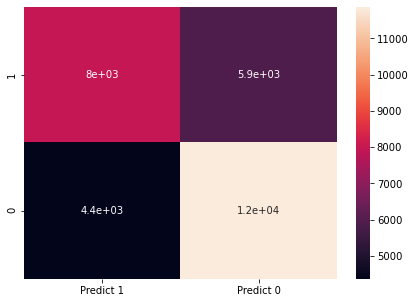

In [323]:
cm=metrics.confusion_matrix(y_val, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [324]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [325]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [326]:
#we can pass a dictionary {0:0.18,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.18,1:0.81},random_state=1)

In [327]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.81}, random_state=1)

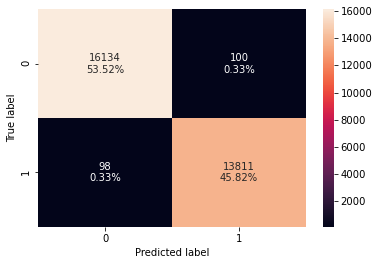

In [328]:
confusion_matrix_sklearn(dtree, x_val, y_val)

In [329]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, x_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999929  0.999969   0.999877  0.999923


In [330]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, x_val, y_val)
print("Validation performance \n",dtree_model_test_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0  0.993431  0.992954   0.992811  0.992883


In [331]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

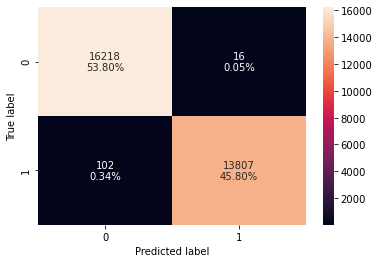

In [332]:
confusion_matrix_sklearn(bagging, x_val, y_val)

In [333]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999147  0.998182   0.999969  0.999075


In [334]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, x_val, y_val)
print("validation performance \n",bagging_model_test_perf)

validation performance 
    Accuracy    Recall  Precision        F1
0  0.996085  0.992667   0.998843  0.995745


In [335]:
testdata  = pd.read_csv('account_test_1.csv')

In [336]:
xtest=testdata.copy()

In [337]:
accidf=xtest["AccID"]
xtest.loc[xtest['Value'] == 0,'Value'] = np.nan
xtest.loc[xtest['PropertySize'] == 0,'PropertySize'] = np.nan
xtest.loc[xtest['CollectedAmt'] == 0,'CollectedAmt'] = np.nan
xtest.loc[xtest['BillingAmt'] == 0,'BillingAmt'] = np.nan
xtest.loc[xtest['DebtAmt'] == 0,'DebtAmt'] = np.nan
xtest.loc[xtest['WriteOffAmt'] == 0,'WriteOffAmt'] = np.nan
xtest.loc[xtest['CollectionRatio'] == 0,'CollectionRatio'] = np.nan
xtest.loc[xtest['TotalElectricityBill'] == 0,'TotalElectricityBill'] = np.nan
xtest.loc[xtest['DebtBillingRatio'] == 0,'DebtBillingRatio'] = np.nan
xtest.loc[xtest['AverageBillingAmt'] == 0,'AverageBillingAmt'] = np.nan
xtest["Value_log"] = np.log(xtest["Value"])
xtest["PropertySize_log"] = np.log(xtest["PropertySize"])
xtest["CollectedAmt_log"] = np.log(xtest["CollectedAmt"])
xtest["BillingAmt_log"] = np.log(xtest["BillingAmt"])
xtest["DebtAmt_log"] = np.log(xtest["DebtAmt"])
xtest["WriteOffAmt_log"] = np.log(xtest["WriteOffAmt"])
xtest["CollectionRatio_log"] = np.log(xtest["CollectionRatio"]+0.0001)
xtest["TotalElectricityBill_log"] = np.log(xtest["TotalElectricityBill"])
xtest["DebtBillingRatio_log"] = np.log(xtest["DebtBillingRatio"])
xtest["AverageBillingAmt_log"] = np.log(xtest["AverageBillingAmt"])

In [338]:
xtest.drop(['Value','PropertySize','BillingAmt','AverageBillingAmt','CollectedAmt','AverageCollectedAmt',
           'DebtAmt','WriteOffAmt', 'CollectionRatio', 'DebtBillingRatio', 'TotalElectricityBill','Category','HasID'],axis=1, inplace=True)

In [339]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=np.nan, strategy="mean")
cols=['Value_log','PropertySize_log','CollectedAmt_log','BillingAmt_log','DebtAmt_log','WriteOffAmt_log','CollectionRatio_log'
     ,'TotalElectricityBill_log','DebtBillingRatio_log','AverageBillingAmt_log']
imputer = rep_0.fit(xtest[cols])
xtest[cols] = imputer.transform(xtest[cols])

In [340]:
xtest["AccID"]=0
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33493 entries, 0 to 33492
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccID                     33493 non-null  int64  
 1   CategoryID                33493 non-null  int64  
 2   Value_log                 33493 non-null  float64
 3   PropertySize_log          33493 non-null  float64
 4   CollectedAmt_log          33493 non-null  float64
 5   BillingAmt_log            33493 non-null  float64
 6   DebtAmt_log               33493 non-null  float64
 7   WriteOffAmt_log           33493 non-null  float64
 8   CollectionRatio_log       33493 non-null  float64
 9   TotalElectricityBill_log  33493 non-null  float64
 10  DebtBillingRatio_log      33493 non-null  float64
 11  AverageBillingAmt_log     33493 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 3.1 MB


In [341]:
ypred = pd.DataFrame({'Label': pd.Series(dtree.predict(xtest))})

In [342]:
bagpred=pd.DataFrame({'bagging': pd.Series(bagging.predict(xtest))})

In [343]:
Logre = pd.DataFrame({'Logre': pd.Series(model.predict(xtest))})

In [344]:
ypred["AccID"]=accidf

In [345]:
ypred = ypred[['AccID',"Label"]]

In [346]:
ypred

,AccID,Label
0,d0390389-df62-4bf1-8659-bbc736ce777d,1
1,b662b850-85e7-40d6-8fdd-3c2566a154dd,1
2,41b6ebc4-569c-4c93-8cfa-3d85bce546ac,1
3,6f0ecc23-da5c-4b84-bcd0-4fae4b3a5aec,1
4,6467f24e-d256-4e6d-8c0d-b726e8d80f48,1
...,...,...
33488,eb61949a-70b3-46db-b978-9e20f0d8919d,1
33489,6d2d00c3-dbd7-49a7-abc8-b1635af2cc32,1
33490,f9ab20e9-5803-46c5-b41e-bed6fda06773,1
33491,fedb8241-a9fb-48dd-adfa-b874e0da7ac5,1


In [347]:
bagpred

,bagging
0,1
1,1
2,1
3,1
4,1
...,...
33488,1
33489,1
33490,1
33491,1


In [348]:
ypred.to_csv('prediction result_3', index = False)

In [349]:
Logre["AccID"]=accidf

In [350]:
Logre = Logre[['AccID',"Label"]]

KeyError: "['Label'] not in index"

In [ ]:
Logre

In [ ]:
Logre.to_csv('prediction result_2', index = False)